# Predictive Model

In [1]:
import pandas as pd
import numpy as np

import os

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size':14})

In [2]:
#getting current directory
cwd=os.getcwd()

df=pd.read_csv(cwd+"/filtered_customer_booking.csv",index_col=0)

In [3]:
df.reset_index(drop=True)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49978,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49979,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49980,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


In [4]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


In [5]:
df_final=df

In [6]:
from sklearn.preprocessing import OneHotEncoder

# create instance of encoder
encoder=OneHotEncoder()

# one hot encoder sales channel
encoder_df=pd.DataFrame(encoder.fit_transform(df[["sales_channel"]]).toarray())
encoder_df=encoder_df.rename(columns={0:'internet',1:'Mobile',})
df_final=df_final.join(encoder_df)

#one hot encode trip type
encoder_df = pd.DataFrame(encoder.fit_transform(df[["trip_type"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'RoundTrip', 1:'OneWayTrip',2:'CircleTrip'})
df_final = df_final.join(encoder_df)

In [7]:
df_final

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,internet,Mobile,RoundTrip,OneWayTrip,CircleTrip
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,1.0,0.0,0.0,0.0,1.0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,1.0,0.0,0.0,0.0,1.0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,1.0,0.0,0.0,0.0,1.0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,1.0,0.0,0.0,0.0,1.0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0,NaN,NaN,NaN,NaN,NaN
49996,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0,NaN,NaN,NaN,NaN,NaN
49997,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0,NaN,NaN,NaN,NaN,NaN
49998,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0,NaN,NaN,NaN,NaN,NaN


In [8]:
#drop categorical columns now
df_final.drop(['sales_channel', 'trip_type','booking_origin', 'route'], axis=1, inplace = True)

In [9]:
#store the label for supervised learning
label=df['booking_complete']

In [10]:
df_final=df_final.drop(['booking_complete'],axis=1)

In [11]:
df_final

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,internet,Mobile,RoundTrip,OneWayTrip,CircleTrip
0,2,262,19,7,6,1,0,0,5.52,1.0,0.0,0.0,0.0,1.0
1,1,112,20,3,6,0,0,0,5.52,1.0,0.0,0.0,0.0,1.0
2,2,243,22,17,3,1,1,0,5.52,1.0,0.0,0.0,0.0,1.0
3,1,96,31,4,6,0,0,1,5.52,1.0,0.0,0.0,0.0,1.0
4,2,68,22,15,3,1,0,1,5.52,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,6,1,0,1,5.62,NaN,NaN,NaN,NaN,NaN
49996,1,111,6,4,7,0,0,0,5.62,NaN,NaN,NaN,NaN,NaN
49997,1,24,6,22,6,0,0,1,5.62,NaN,NaN,NaN,NaN,NaN
49998,1,15,6,11,1,1,0,1,5.62,NaN,NaN,NaN,NaN,NaN


# Normalizing the Values

In [12]:
from sklearn.preprocessing import StandardScaler

#create a scaler object
scaler=StandardScaler()

#fit and transform the data
scaled_df=scaler.fit_transform(df_final)

In [13]:
#create a dataframe called scaled data
scaled_df=pd.DataFrame(scaled_df,columns=df_final.columns)

In [14]:
#add the label to the dataframe
scaled_df['label']=label

In [15]:
scaled_df

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,internet,Mobile,RoundTrip,OneWayTrip,CircleTrip,label
0,0.400769,1.971093,-0.119401,-0.381588,1.096876,0.703587,-0.650054,-0.863557,-1.174049,0.355751,-0.355751,-0.04824,-0.088352,0.100845,0.0
1,-0.579424,0.302987,-0.089895,-1.120618,1.096876,-1.421288,-0.650054,-0.863557,-1.174049,0.355751,-0.355751,-0.04824,-0.088352,0.100845,0.0
2,0.400769,1.759799,-0.030885,1.465988,-0.408618,0.703587,1.538334,-0.863557,-1.174049,0.355751,-0.355751,-0.04824,-0.088352,0.100845,0.0
3,-0.579424,0.125056,0.234662,-0.935861,1.096876,-1.421288,-0.650054,1.158002,-1.174049,0.355751,-0.355751,-0.04824,-0.088352,0.100845,0.0
4,0.400769,-0.186323,-0.030885,1.096473,-0.408618,0.703587,-0.650054,1.158002,-1.174049,0.355751,-0.355751,-0.04824,-0.088352,0.100845,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,0.400769,-0.642272,-0.502969,-0.012073,1.096876,0.703587,-0.650054,1.158002,-1.107240,NaN,NaN,NaN,NaN,NaN,1.0
49978,-0.579424,0.291867,-0.502969,-0.935861,1.598707,-1.421288,-0.650054,-0.863557,-1.107240,NaN,NaN,NaN,NaN,NaN,0.0
49979,-0.579424,-0.675634,-0.502969,2.389776,1.096876,-1.421288,-0.650054,1.158002,-1.107240,NaN,NaN,NaN,NaN,NaN,0.0
49980,-0.579424,-0.775721,-0.502969,0.357443,-1.412280,0.703587,-0.650054,1.158002,-1.107240,NaN,NaN,NaN,NaN,NaN,1.0


In [16]:
scaled_df

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,internet,Mobile,RoundTrip,OneWayTrip,CircleTrip,label
0,0.400769,1.971093,-0.119401,-0.381588,1.096876,0.703587,-0.650054,-0.863557,-1.174049,0.355751,-0.355751,-0.04824,-0.088352,0.100845,0.0
1,-0.579424,0.302987,-0.089895,-1.120618,1.096876,-1.421288,-0.650054,-0.863557,-1.174049,0.355751,-0.355751,-0.04824,-0.088352,0.100845,0.0
2,0.400769,1.759799,-0.030885,1.465988,-0.408618,0.703587,1.538334,-0.863557,-1.174049,0.355751,-0.355751,-0.04824,-0.088352,0.100845,0.0
3,-0.579424,0.125056,0.234662,-0.935861,1.096876,-1.421288,-0.650054,1.158002,-1.174049,0.355751,-0.355751,-0.04824,-0.088352,0.100845,0.0
4,0.400769,-0.186323,-0.030885,1.096473,-0.408618,0.703587,-0.650054,1.158002,-1.174049,0.355751,-0.355751,-0.04824,-0.088352,0.100845,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,0.400769,-0.642272,-0.502969,-0.012073,1.096876,0.703587,-0.650054,1.158002,-1.107240,NaN,NaN,NaN,NaN,NaN,1.0
49978,-0.579424,0.291867,-0.502969,-0.935861,1.598707,-1.421288,-0.650054,-0.863557,-1.107240,NaN,NaN,NaN,NaN,NaN,0.0
49979,-0.579424,-0.675634,-0.502969,2.389776,1.096876,-1.421288,-0.650054,1.158002,-1.107240,NaN,NaN,NaN,NaN,NaN,0.0
49980,-0.579424,-0.775721,-0.502969,0.357443,-1.412280,0.703587,-0.650054,1.158002,-1.107240,NaN,NaN,NaN,NaN,NaN,1.0


In [17]:
scaled_df['Mobile'].fillna(0,inplace=True)
scaled_df['internet'].fillna(0,inplace=True)
scaled_df['RoundTrip'].fillna(0,inplace=True)
scaled_df['OneWayTrip'].fillna(0,inplace=True)
scaled_df['CircleTrip'].fillna(0,inplace=True)
scaled_df

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,internet,Mobile,RoundTrip,OneWayTrip,CircleTrip,label
0,0.400769,1.971093,-0.119401,-0.381588,1.096876,0.703587,-0.650054,-0.863557,-1.174049,0.355751,-0.355751,-0.04824,-0.088352,0.100845,0.0
1,-0.579424,0.302987,-0.089895,-1.120618,1.096876,-1.421288,-0.650054,-0.863557,-1.174049,0.355751,-0.355751,-0.04824,-0.088352,0.100845,0.0
2,0.400769,1.759799,-0.030885,1.465988,-0.408618,0.703587,1.538334,-0.863557,-1.174049,0.355751,-0.355751,-0.04824,-0.088352,0.100845,0.0
3,-0.579424,0.125056,0.234662,-0.935861,1.096876,-1.421288,-0.650054,1.158002,-1.174049,0.355751,-0.355751,-0.04824,-0.088352,0.100845,0.0
4,0.400769,-0.186323,-0.030885,1.096473,-0.408618,0.703587,-0.650054,1.158002,-1.174049,0.355751,-0.355751,-0.04824,-0.088352,0.100845,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,0.400769,-0.642272,-0.502969,-0.012073,1.096876,0.703587,-0.650054,1.158002,-1.107240,0.000000,0.000000,0.00000,0.000000,0.000000,1.0
49978,-0.579424,0.291867,-0.502969,-0.935861,1.598707,-1.421288,-0.650054,-0.863557,-1.107240,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
49979,-0.579424,-0.675634,-0.502969,2.389776,1.096876,-1.421288,-0.650054,1.158002,-1.107240,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
49980,-0.579424,-0.775721,-0.502969,0.357443,-1.412280,0.703587,-0.650054,1.158002,-1.107240,0.000000,0.000000,0.00000,0.000000,0.000000,1.0


# Correlation Matrix

<Axes: >

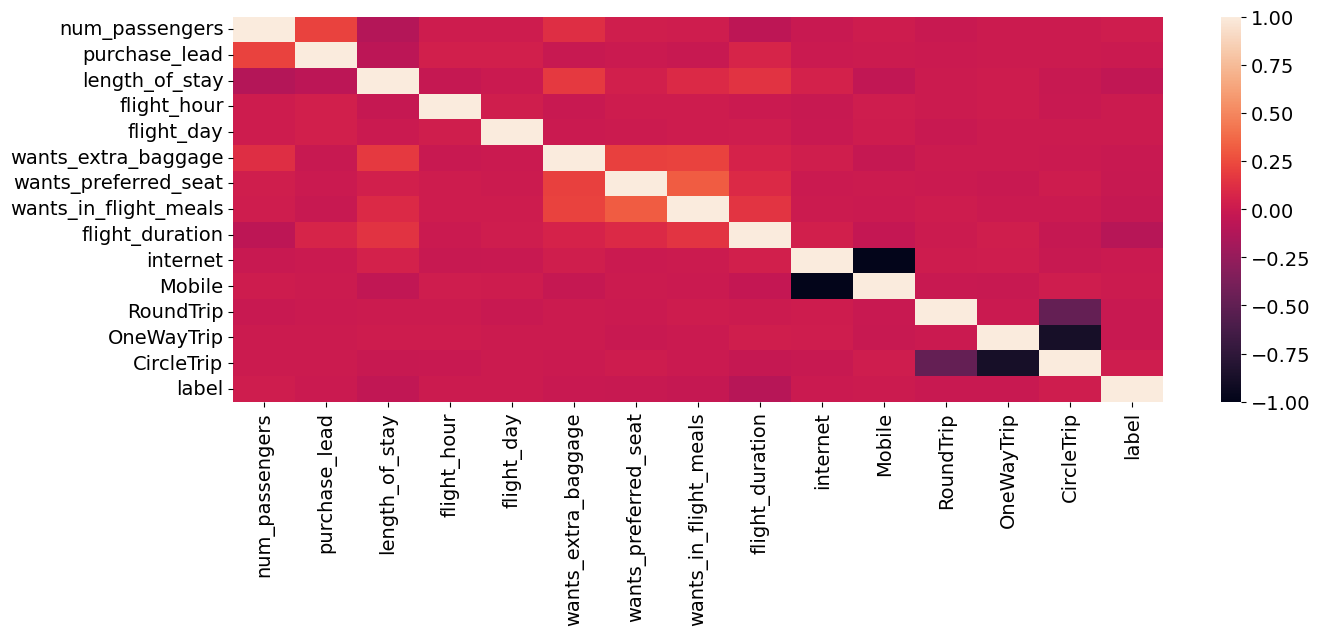

In [18]:
corr=scaled_df.corr()

plt.figure(figsize=(15,5))

#plot the heatmap
sns.heatmap(corr)

# Split Test and Train Data

In [25]:
from sklearn.model_selection import train_test_split

X = scaled_df.iloc[:,:-1]
y = scaled_df['label']

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=42)

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.inspection import permutation_importance

from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import GridSearchCV,  RepeatedStratifiedKFold

In [39]:
np.unique(y_train,return_counts=True)
y_train[np.isnan(y_train)]=0;
np.unique(y_train,return_counts=True)

(array([0., 1.]), array([33931,  6054], dtype=int64))

In [49]:
np.unique(y_test,return_counts=True)
y_test[np.isnan(y_test)]=0;
np.unique(y_test,return_counts=True)

(array([0., 1.]), array([8577, 1420], dtype=int64))

In [40]:
"""
    Create functions to fit and predict the values of whether customer would complete the booking.
    Also functions with metrics to evaluate the model prediction.

"""

'\n    Create functions to fit and predict the values of whether customer would complete the booking.\n    Also functions with metrics to evaluate the model prediction.\n\n'

In [41]:
def model_fit_predict(model,X,y,X_predict):
    model.fit(X,y)
    return model.predict(X_predict)
def acc_score(y_true,y_pred):
    return accuracy_score(y_true,y_pred)
def pre_score(y_true,y_pred):
    return precision_score(y_true,y_pred)
def f_score(y_true,y_pred):
    return f1_score(y_true,y_pred)

# RANDOM FOREST CLASSIFIER

In [42]:
#create an instance of a classifier and fit the training data
clf_rf=RandomForestClassifier(max_depth=50,min_samples_split=5,random_state=0)


# checking training accuracy

In [44]:
y_pred_train=model_fit_predict(clf_rf,X_train,y_train,X_train)
set(y_pred_train)

#f1 score for training data
f1=round(f_score(y_train,y_pred_train))

#accuracy score of the training data
acc=round(acc_score(y_train,y_pred_train))

#precision score for training data
pre = round(precision_score(y_train, y_pred_train),2) 

print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")

Accuracy, precision and f1-score for training data are 1, 1.0 and 1 respectively


0.9231461798174315

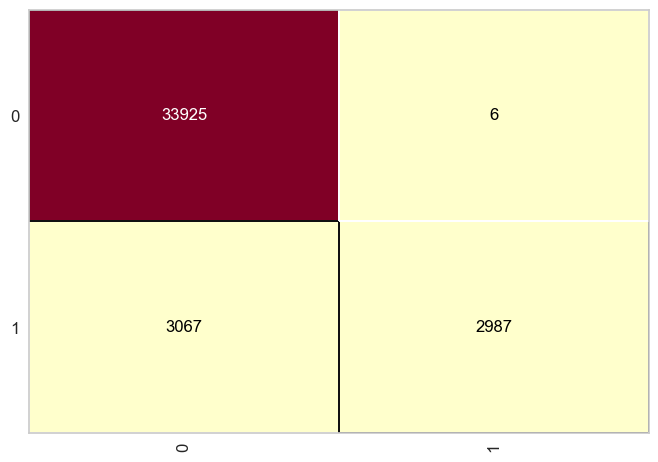

In [45]:
cm=ConfusionMatrix(clf_rf,classes=[0,1])
cm.fit(X_train,y_train)

cm.score(X_train,y_train)

# checking test accuracy

In [53]:
len(y_train)
len(y_pred_test)

9997

In [54]:
clf_rf=RandomForestClassifier(max_depth=50,min_samples_split=5,random_state=0)

y_pred_test=model_fit_predict(clf_rf,X_train,y_train,X_test)

#f1 score for training data
f1=round(f1_score(y_test,y_pred_test),2)

#accuracy score for training data
acc=round(accuracy_score(y_train[:9997],y_pred_test),2)

#precision score for training data
pre=round(precision_score(y_test,y_pred_test),2)

print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")

Accuracy, precision and f1-score for training data are 0.84, 0.32 and 0.02 respectively


0.8558567570271082

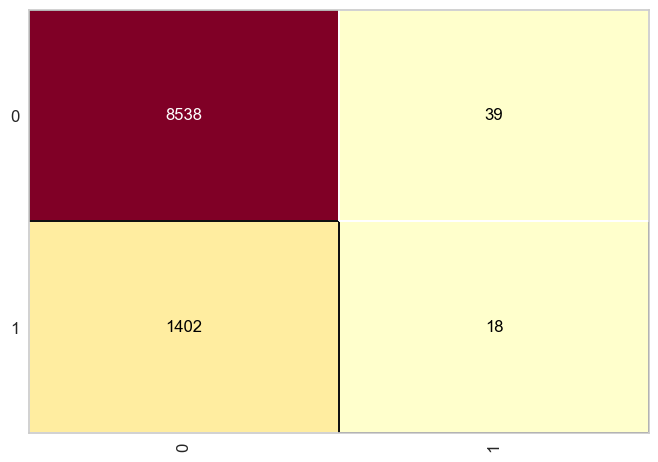

In [55]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

Text(0.5, 0, 'Random Forest Feature Importance')

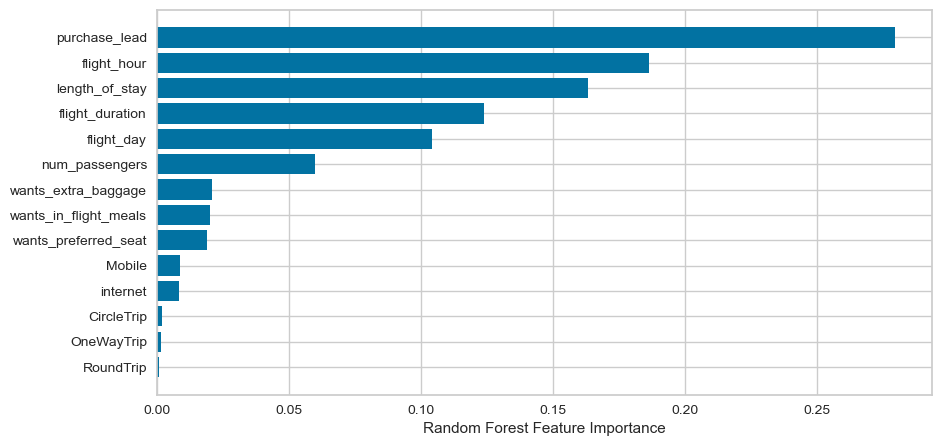

In [56]:
plt.figure(figsize=(10,5))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

One major problem behind getting low F1 score is imbalanced dataset. We have higher entries that are classified 0 than 1. We could reduce the number of entries that are classified 0 to be equal around the number of entries that are classified as 1.

# Balancing the DataSet

In [57]:
scaled_df.label.value_counts()

label
0.0    42490
1.0     7474
Name: count, dtype: int64

In [60]:
#create a dataframe having all labels 0 with 10000 samples
scaled_df_0=scaled_df[scaled_df.label==0].sample(n=8000)

8000

In [61]:
#concatenate the two dataframe,one having all labels 0 and the other having all labels 1
scaled_df_new=pd.concat([scaled_df[scaled_df.label==1],scaled_df_0],ignore_index=True)


In [62]:
#shuffle the dataframes
scaled_df_new=scaled_df_new.sample(frac=1).reset_index(drop=True)


In [63]:
scaled_df_new

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,internet,Mobile,RoundTrip,OneWayTrip,CircleTrip,label
0,0.400769,-0.375375,0.352683,-0.566346,1.598707,-1.421288,-0.650054,-0.863557,0.870293,0.355751,-0.355751,-0.04824,-0.088352,0.100845,0.0
1,0.400769,-0.508824,-0.532474,-0.935861,1.598707,-1.421288,-0.650054,-0.863557,-1.107240,-2.810957,2.810957,-0.04824,-0.088352,0.100845,0.0
2,2.361155,1.604110,-0.502969,-0.935861,0.093214,0.703587,-0.650054,1.158002,0.930420,0.355751,-0.355751,-0.04824,-0.088352,0.100845,1.0
3,4.321541,2.516007,-0.502969,-1.120618,0.595045,0.703587,-0.650054,1.158002,-0.185282,-2.810957,2.810957,-0.04824,-0.088352,0.100845,0.0
4,2.361155,1.226006,-0.561979,-1.305376,-0.910449,0.703587,-0.650054,-0.863557,-0.439155,0.355751,-0.355751,-0.04824,-0.088352,0.100845,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15469,0.400769,-0.508824,-0.532474,-0.935861,-0.408618,0.703587,-0.650054,-0.863557,-0.185282,0.355751,-0.355751,-0.04824,-0.088352,0.100845,0.0
15470,-0.579424,-0.586669,-0.561979,-1.120618,-0.910449,0.703587,-0.650054,-0.863557,0.870293,0.355751,-0.355751,-0.04824,-0.088352,0.100845,0.0
15471,-0.579424,1.592989,-0.591484,1.465988,0.093214,0.703587,-0.650054,-0.863557,-1.300985,0.355751,-0.355751,-0.04824,-0.088352,0.100845,1.0
15472,-0.579424,-0.531065,-0.561979,-1.305376,-0.910449,0.703587,-0.650054,-0.863557,0.195526,0.355751,-0.355751,-0.04824,-0.088352,0.100845,1.0


In [64]:
X = scaled_df_new.iloc[:,:-1]
y = scaled_df_new['label']

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=42)

In [65]:
#create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(n_estimators=50,max_depth =50 , min_samples_split=5,random_state=0)

In [66]:
y_pred_test = model_fit_predict(clf_rf, X_train, y_train, X_test)

#f1 score for training data
f1 = round(f1_score(y_test, y_pred_test),2) 

#accuracy score for training data
acc = round(accuracy_score(y_test, y_pred_test),2) 

#precision score for training data
pre = round(precision_score(y_test, y_pred_test),2) 

recall = round(recall_score(y_test, y_pred_test),2)

specificity = round(recall_score(y_test, y_pred_test, pos_label=0),2)

print(f"Accuracy, precision, recall and f1-score for training data are {acc}, {pre}, {recall}, {specificity} and {f1} respectively") 

Accuracy, precision, recall and f1-score for training data are 0.58, 0.57, 0.56, 0.61 and 0.57 respectively


0.5844911147011309

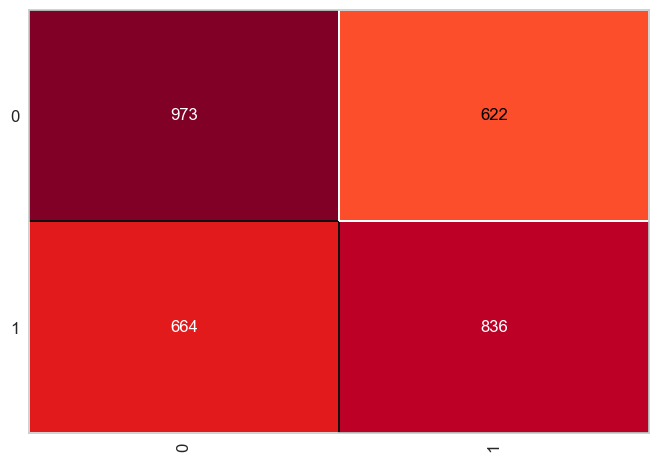

In [67]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

Text(0.5, 0, 'Random Forest Feature Importance')

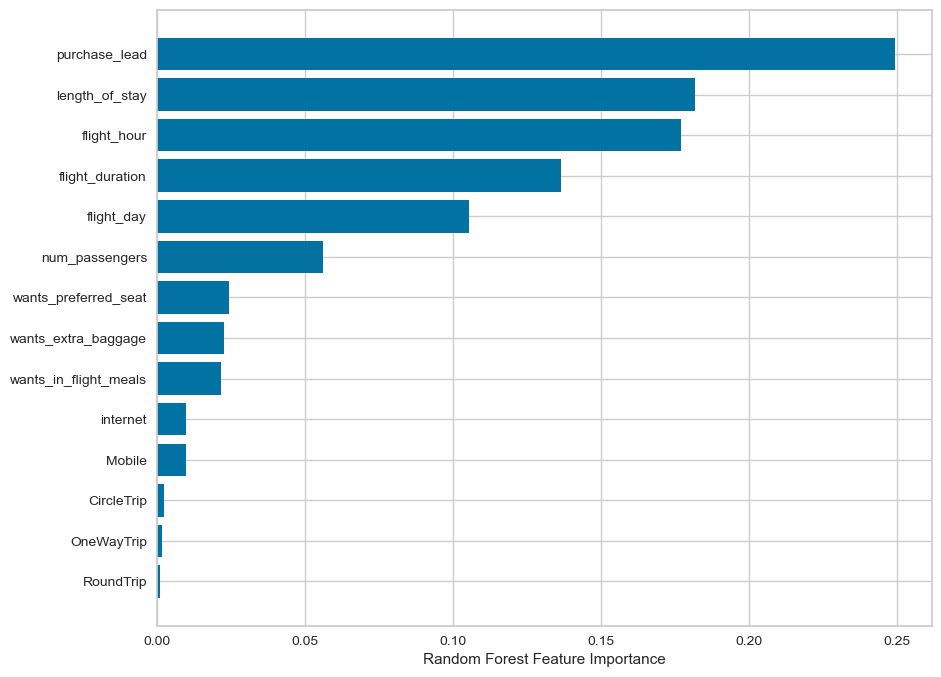

In [68]:
plt.figure(figsize=(10,8))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")